In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv('C:/Users/aimom/OneDrive/デスクトップ/spaceship-titanic/train.csv')
test_df=pd.read_csv('C:/Users/aimom/OneDrive/デスクトップ/spaceship-titanic/test.csv')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
all_df=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
all_df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [7]:
#IDの整理：ID01とID02を作成
all_df['ID01']=all_df["PassengerId"].str.split("_",expand=True)[0]
all_df['ID02']=all_df["PassengerId"].str.split("_",expand=True)[1]
all_df['ID01']=all_df['ID01'].astype(int)
all_df['ID02']=all_df['ID02'].astype(int)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  ID01          12970 non-null  int32  
 15  ID02          12970 non-null  int32  
dtypes: float64(6), int32(2), object(8)
memory usage: 1.5+ MB


In [8]:
#Homeplanetの欠損値を補完：最頻値で補完
all_df['HomePlanet'].fillna(all_df['HomePlanet'].mode()[0],inplace=True)

In [9]:
#CryoSleepの欠損値を補完：最頻値で補完
all_df['CryoSleep'].fillna(all_df['CryoSleep'].mode()[0],inplace=True)

In [10]:
#Cabinの整理：Cabin1,Cabin2,Cabin3を作成
all_df['Cabin1']=all_df['Cabin'].str.split("/",expand=True)[0]
all_df['Cabin2']=all_df['Cabin'].str.split("/",expand=True)[1]
all_df['Cabin3']=all_df['Cabin'].str.split("/",expand=True)[2]


In [11]:
#plt.figure(figsize=(16,9))
#sns.countplot(all_df["Cabin1"],hue=all_df["Transported"])

In [12]:
#Cabin1の欠損値を補完：最頻値で補完
all_df['Cabin1'].fillna(all_df['Cabin1'].mode()[0],inplace=True)

In [13]:
#Cabin3の欠損値を補完：最頻値で補完
#plt.figure(figsize=(16,9))
#sns.countplot(all_df["Cabin3"],hue=all_df["Transported"])
all_df['Cabin3'].fillna(all_df['Cabin3'].mode()[0],inplace=True)

(array([408., 389., 407., 395., 403., 338., 348., 313., 325., 341., 318.,
        346., 305., 319., 303., 221., 215., 154., 131., 143., 129., 142.,
        142., 145., 134., 129., 149., 133., 141., 139., 115.,  93., 107.,
         87.,  91.,  97., 106.,  97.,  96.,  86.,  92.,  93.,  98.,  96.,
        103.,  96.,  93., 101., 113.,  99.,  95., 114., 104.,  93.,  90.,
        106.,  92.,  95.,  84.,  96.,  96.,  92.,  90.,  97.,  90., 106.,
         90.,  89.,  97.,  88., 100.,  90., 105., 104.,  90.,  57.,  45.,
         48.,  51.,  41.,  40.,  44.,  51.,  44.,  42.,  51.,  48.,  50.,
         44.,  40.,  33.,  26.,  23.,  21.,  15.,   0.,   0.,   0.,   0.,
        299.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.

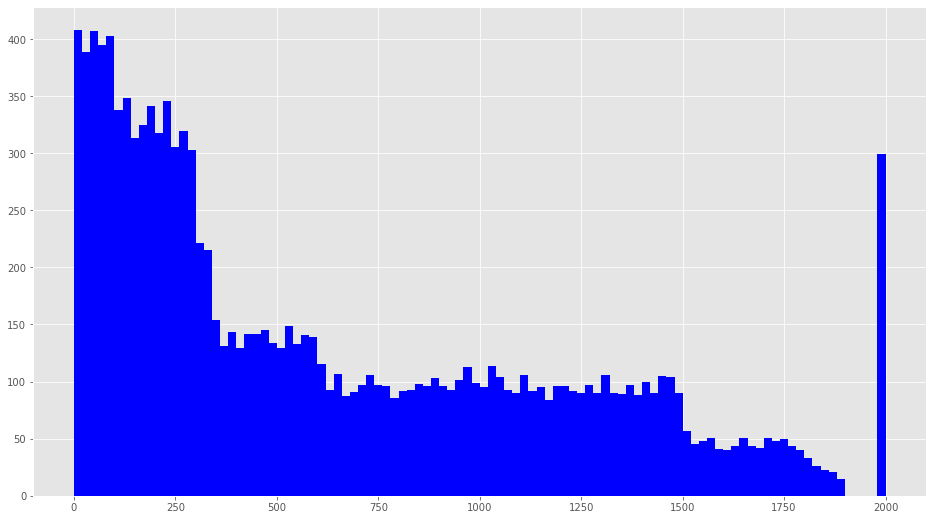

In [14]:
#Cabin2の欠損値を補完：関係ない数値で補完
#all_df["Cabin2"].value_counts()
all_df['Cabin2'].fillna(2000,inplace=True)
all_df['Cabin2']=all_df['Cabin2'].astype(int)
plt.figure(figsize=(16,9))
plt.hist(all_df["Cabin2"],bins=100,color="blue")

In [15]:
all_df.loc[(0<=all_df["Cabin2"])&(all_df["Cabin2"]<250),"Cabin2"]=1
all_df.loc[(250<=all_df["Cabin2"])&(all_df["Cabin2"]<500),"Cabin2"]=2
all_df.loc[(500<=all_df["Cabin2"])&(all_df["Cabin2"]<750),"Cabin2"]=3
all_df.loc[(750<=all_df["Cabin2"])&(all_df["Cabin2"]<1000),"Cabin2"]=4
all_df.loc[(1000<=all_df["Cabin2"])&(all_df["Cabin2"]<1250),"Cabin2"]=5
all_df.loc[(1250<=all_df["Cabin2"])&(all_df["Cabin2"]<1500),"Cabin2"]=6
all_df.loc[(1500<=all_df["Cabin2"])&(all_df["Cabin2"]<1750),"Cabin2"]=7
all_df.loc[(1750<=all_df["Cabin2"])&(all_df["Cabin2"]<2000),"Cabin2"]=8


In [16]:
all_df['Cabin2'].value_counts()

1       4489
2       2325
3       1437
4       1213
5       1200
6       1193
7        589
2000     299
8        225
Name: Cabin2, dtype: int64

c:\Users\aimom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin2', ylabel='count'>

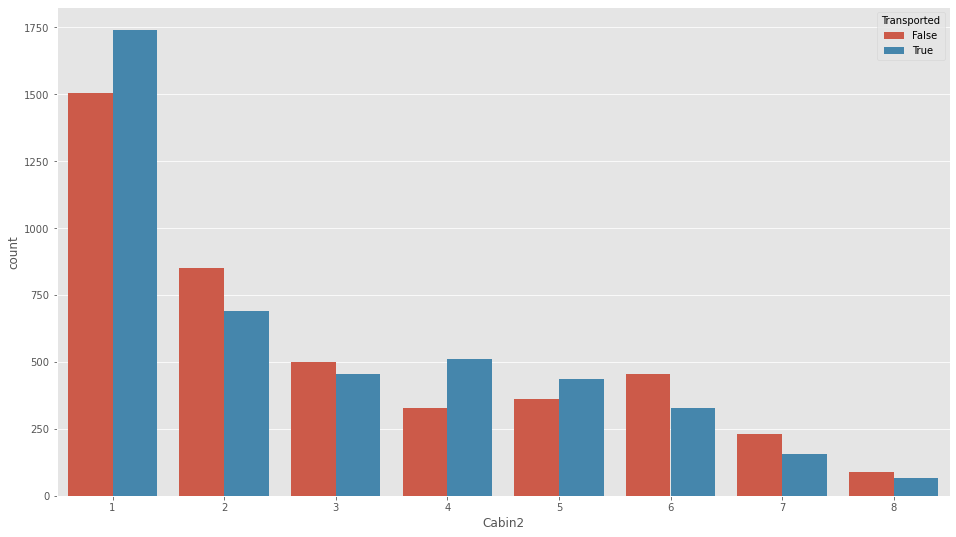

In [17]:
all_df.loc[(all_df["Cabin2"]==2000),"Cabin2"]=1
plt.figure(figsize=(16,9))
sns.countplot(all_df["Cabin2"],hue=all_df["Transported"])

In [18]:
#Destinationの欠損値を補完：最頻値で補完
all_df['Destination'].fillna(all_df['Destination'].mode()[0],inplace=True)

In [19]:
#VIPの欠損値を補完：最頻値で補完
all_df['VIP'].fillna(all_df['VIP'].mode()[0],inplace=True)

In [20]:
#Ageの欠損値を補完：最頻値で補完
all_df["Age"].fillna(all_df["Age"].mode()[0], inplace=True)

In [21]:
#RoomService/FoodCourt/ShoppingMall/Spa/VRDeckの欠損値を補完：中央値で補完
all_df["RoomService"].fillna(all_df["RoomService"].median(), inplace=True)
all_df["FoodCourt"].fillna(all_df["FoodCourt"].median(), inplace=True)
all_df["ShoppingMall"].fillna(all_df["ShoppingMall"].median(), inplace=True)
all_df["Spa"].fillna(all_df["Spa"].median(), inplace=True)
all_df["VRDeck"].fillna(all_df["VRDeck"].median(), inplace=True)


In [22]:
all_df["ServiceInTotal"]=all_df["RoomService"]+all_df["FoodCourt"]+all_df["ShoppingMall"]+all_df["Spa"]+all_df["VRDeck"]

In [23]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     12970 non-null  object 
 1   HomePlanet      12970 non-null  object 
 2   CryoSleep       12970 non-null  bool   
 3   Cabin           12671 non-null  object 
 4   Destination     12970 non-null  object 
 5   Age             12970 non-null  float64
 6   VIP             12970 non-null  bool   
 7   RoomService     12970 non-null  float64
 8   FoodCourt       12970 non-null  float64
 9   ShoppingMall    12970 non-null  float64
 10  Spa             12970 non-null  float64
 11  VRDeck          12970 non-null  float64
 12  Name            12676 non-null  object 
 13  Transported     8693 non-null   object 
 14  ID01            12970 non-null  int32  
 15  ID02            12970 non-null  int32  
 16  Cabin1          12970 non-null  object 
 17  Cabin2          12970 non-null 

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # Instantiate the LabelEncoder class
for cat in ["HomePlanet","Destination","Transported","Cabin1","Cabin3"]:
    all_df[cat]=le.fit_transform(all_df[cat].astype(str))
all_df=all_df.drop(["Name"],axis=1)
all_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID01,ID02,Cabin1,Cabin2,Cabin3,ServiceInTotal
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,0,0.0
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,1,2,1,5,1,1,736.0
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,1,1,10383.0
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,1,1,5176.0
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,1,4,1,5,1,1,1091.0


In [25]:
all_corr=all_df.corr()
all_corr

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID01,ID02,Cabin1,Cabin2,Cabin3,ServiceInTotal
HomePlanet,1.000000,0.088630,0.033180,0.136897,0.119579,0.216606,0.064958,0.109134,0.052198,0.036516,0.055892,-0.020411,0.036604,-0.400755,-0.193561,0.002448,0.144509
CryoSleep,0.088630,1.000000,-0.098933,-0.065725,-0.076891,-0.251463,-0.208257,-0.216048,-0.199305,-0.189989,0.198872,-0.004772,0.058163,0.013106,-0.041694,0.016018,-0.377273
Destination,0.033180,-0.098933,1.000000,-0.010762,-0.037035,0.044856,-0.107682,0.026448,-0.067254,-0.071978,-0.033879,0.001547,-0.032726,0.195229,0.102492,-0.010996,-0.101151
Age,0.136897,-0.065725,-0.010762,1.000000,0.081716,0.067137,0.119804,0.034785,0.114392,0.100706,-0.035527,-0.012657,-0.127858,-0.239154,-0.129242,0.015344,0.177009
VIP,0.119579,-0.076891,-0.037035,0.081716,1.000000,0.059601,0.122726,0.024069,0.080932,0.109891,-0.031808,0.012073,0.002248,-0.169288,-0.086795,-0.010322,0.165179
RoomService,0.216606,-0.251463,0.044856,0.067137,0.059601,1.000000,-0.019647,0.054987,0.008570,-0.023130,-0.105310,-0.000373,-0.024130,-0.025193,-0.007706,-0.004064,0.222855
FoodCourt,0.064958,-0.208257,-0.107682,0.119804,0.122726,-0.019647,1.000000,-0.001744,0.226243,0.240978,0.013958,-0.010385,0.017392,-0.307818,-0.170615,0.010356,0.744163
ShoppingMall,0.109134,-0.216048,0.026448,0.034785,0.024069,0.054987,-0.001744,1.000000,0.011433,0.003102,0.006505,-0.006195,-0.033520,-0.027701,-0.005320,-0.021506,0.225522
Spa,0.052198,-0.199305,-0.067254,0.114392,0.080932,0.008570,0.226243,0.011433,1.000000,0.145285,-0.093686,-0.006060,0.019444,-0.229290,-0.125820,0.009401,0.589688
VRDeck,0.036516,-0.189989,-0.071978,0.100706,0.109891,-0.023130,0.240978,0.003102,0.145285,1.000000,-0.079551,0.006316,0.009831,-0.249529,-0.131513,0.001701,0.604133


<AxesSubplot:>

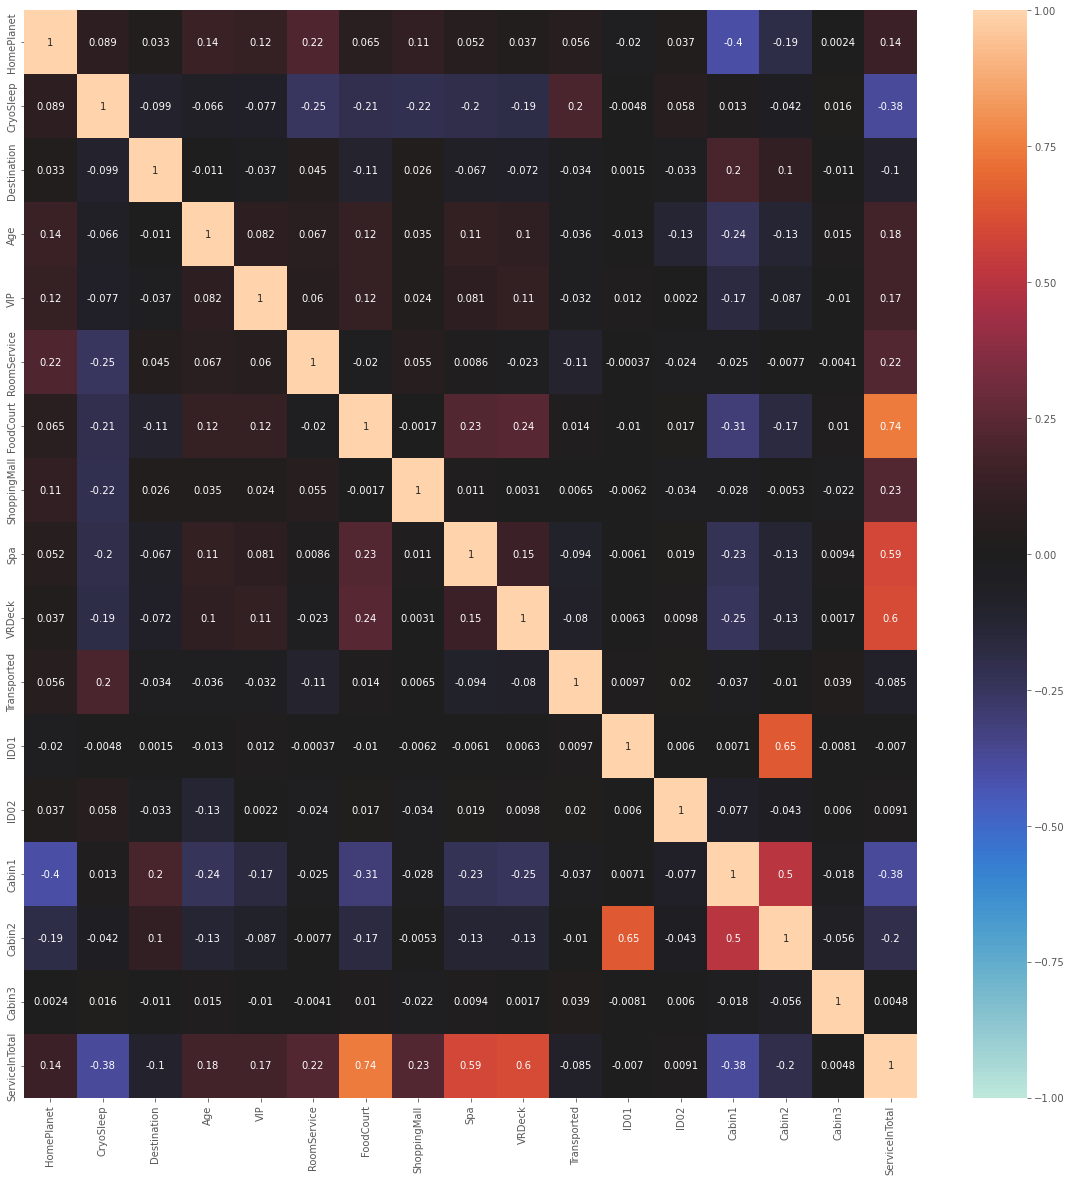

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(all_corr,vmax=1,vmin=-1,center=0,annot=True)

In [27]:
all_df=all_df.drop(["Cabin","ID01"],axis=1)
#all_df['PassengerId'] = train_df['PassengerId'].astype(str)


In [28]:
#学習データとテストデータに分割
train_df1=all_df.loc[all_df["Transported"]==0]
train_df2=all_df.loc[all_df["Transported"]==1]
train_df=pd.concat([train_df1,train_df2],sort=False).reset_index(drop=True)
train_df=train_df.drop(["PassengerId"],axis=1)
train_label1=train_df1["Transported"]
train_label2=train_df2["Transported"]
train_label=pd.concat([train_label1,train_label2],sort=False).reset_index(drop=True)
test_df=all_df.loc[all_df["Transported"]==2]
test_id=test_df["PassengerId"]
test_df=test_df.drop(["PassengerId"],axis=1)

In [29]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID02,Cabin1,Cabin2,Cabin3,ServiceInTotal
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0.0
1,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,1,10383.0
2,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,2,0,1,1,5176.0
3,0,False,2,48.0,False,719.0,1.0,65.0,0.0,24.0,0,1,6,1,1,809.0
4,0,False,2,31.0,False,32.0,0.0,876.0,0.0,0.0,0,1,5,1,1,908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,True,2,23.0,False,0.0,0.0,0.0,0.0,0.0,1,1,6,7,0,0.0
8689,1,False,2,0.0,False,0.0,0.0,0.0,0.0,0.0,1,1,0,1,0,0.0
8690,1,False,2,30.0,False,0.0,3208.0,0.0,2.0,330.0,1,3,0,1,0,3540.0
8691,0,False,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1,6,7,1,1873.0


In [30]:
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,ID02,Cabin1,Cabin2,Cabin3,ServiceInTotal
8693,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,2,1,6,1,1,0.0
8694,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,2,1,5,1,1,2832.0
8695,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,1,2,1,1,0.0
8696,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,2,1,1,7418.0
8697,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,2,1,5,1,1,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0,True,2,34.0,False,0.0,0.0,0.0,0.0,0.0,2,2,6,6,1,0.0
12966,0,False,2,42.0,False,0.0,847.0,17.0,10.0,144.0,2,1,5,1,1,1018.0
12967,2,True,0,18.0,False,0.0,0.0,0.0,0.0,0.0,2,1,3,2,0,0.0
12968,1,False,2,18.0,False,0.0,2680.0,0.0,0.0,523.0,2,1,3,2,0,3203.0


In [31]:
train_df=train_df.drop(["Transported"],axis=1)
test_df=test_df.drop(["Transported"],axis=1)

In [32]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_train,x_valid,y_train,y_valid=train_test_split(train_df,train_label,test_size=0.3,random_state=0)
categories=["HomePlanet","Destination","CryoSleep","VIP","Cabin1","Cabin3","Cabin2","ServiceInTotal","RoomService","FoodCourt","ShoppingMall","VRDeck","Spa"]
lgb_train=lgb.Dataset(x_train,y_train,categorical_feature=categories)
lgb_eval=lgb.Dataset(x_valid,y_valid,reference=lgb_train,categorical_feature=categories)

In [33]:
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 3601 to 5117
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      2608 non-null   int32  
 1   CryoSleep       2608 non-null   bool   
 2   Destination     2608 non-null   int32  
 3   Age             2608 non-null   float64
 4   VIP             2608 non-null   bool   
 5   RoomService     2608 non-null   float64
 6   FoodCourt       2608 non-null   float64
 7   ShoppingMall    2608 non-null   float64
 8   Spa             2608 non-null   float64
 9   VRDeck          2608 non-null   float64
 10  ID02            2608 non-null   int32  
 11  Cabin1          2608 non-null   int32  
 12  Cabin2          2608 non-null   int32  
 13  Cabin3          2608 non-null   int32  
 14  ServiceInTotal  2608 non-null   float64
dtypes: bool(2), float64(7), int32(6)
memory usage: 229.2 KB


In [34]:
lgbm_params={
   "objective":"binary",
  "random_seed":1234,
 "early_stopping_rounds": 20
}

In [35]:
model_lgb = lgb.train(lgbm_params,
                   lgb_train,
                    valid_sets=lgb_eval,
                  num_boost_round=100)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 3075, number of negative: 3010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1237
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505341 -> initscore=0.021365
[LightGBM] [Info] Start training from score 0.021365
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.471484


In [36]:
model_lgb.feature_importance()

array([174,  69, 138, 601,   6,  50,  37,  44,  67,  57,  72, 104, 123,
       137,  31])

<AxesSubplot:>

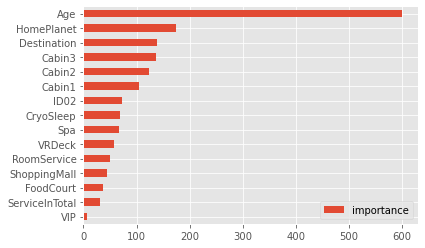

In [37]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=train_df.columns, columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()                

In [38]:
y_pred = model_lgb.predict(x_valid.values, num_iteration=model_lgb.best_iteration)


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,np.round(y_pred))

0.7618865030674846

In [40]:
folds=3
kf=KFold(n_splits=folds)

models=[]
for train_index, valid_index in kf.split(train_df):
    X_train, X_valid = train_df.loc[train_index], train_df.loc[valid_index]
    y_train, y_valid = train_label[train_index], train_label[valid_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories, free_raw_data=False)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categories, free_raw_data=False)

    model_lgb = lgb.train(lgbm_params,
                    lgb_train,
                    valid_sets=lgb_eval,
                    num_boost_round=100)
    y_pred=model_lgb.predict(X_valid,num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid,np.round(y_pred)))
    models.append(model_lgb)

[LightGBM] [Info] Number of positive: 4378, number of negative: 1417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 883
[LightGBM] [Info] Number of data points in the train set: 5795, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.755479 -> initscore=1.128050
[LightGBM] [Info] Start training from score 1.128050
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 1.44747
0.0
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 2897, number of negative: 2898
[LightGBM]

In [41]:
y_preds=[]
for model in models:
    y_pred=model.predict(test_df, num_iteration=model.best_iteration)
    y_preds.append(y_pred)


In [42]:
y_preds

[array([0.77783108, 0.77559784, 0.77783108, ..., 0.77783108, 0.7155341 ,
        0.72750858]),
 array([0.45259226, 0.45512814, 0.54856915, ..., 0.54856915, 0.47517936,
        0.54424985]),
 array([0.30136752, 0.25021484, 0.3998909 , ..., 0.3998909 , 0.2137522 ,
        0.21636386])]

In [43]:
preds=np.array(y_preds)
pred_mean=np.mean(preds,axis=0)
pred_int=(pred_mean>0.5).astype(int)
pred_int

array([1, 0, 1, ..., 1, 0, 0])

In [44]:
pred_bool = np.where(pred_int == 1, 'TRUE', 'FALSE')
pred_bool


array(['TRUE', 'FALSE', 'TRUE', ..., 'TRUE', 'FALSE', 'FALSE'],
      dtype='<U5')

In [45]:
pred_bool_df = pd.DataFrame(pred_bool)
pred_bool_df.columns = ['Transported']
pred_bool_df


,Transported
0,TRUE
1,FALSE
2,TRUE
3,TRUE
4,FALSE
...,...
4272,FALSE
4273,FALSE
4274,TRUE
4275,FALSE


In [46]:
test_id_df = pd.DataFrame(test_id)
test_id_df.columns = ['PassengerId']
test_id_df.reset_index(drop=True, inplace=True)
test_id_df

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [60]:
submission = pd.concat([test_id_df, pred_bool_df], axis=1)
submission

,PassengerId,Transported
0,0013_01,TRUE
1,0018_01,FALSE
2,0019_01,TRUE
3,0021_01,TRUE
4,0023_01,FALSE
...,...,...
4272,9266_02,FALSE
4273,9269_01,FALSE
4274,9271_01,TRUE
4275,9273_01,FALSE


In [61]:
submission.to_csv("C:/Users/aimom/OneDrive/デスクトップ/spaceship-titanic/submission.csv",index=False)


In [48]:
#submission = pd.DataFrame()  # Define the "submission" variable
#submission["Transported"]=preds_int
#submission.to_csv("C:/Users/aimom/OneDrive/デスクトップ/spaceship-titanic/submission.csv",index=False)


In [49]:
#import lightgbm as lgb
#import xgboost as xgb

#categories = train_df.columns[train_df.dtypes == "category"]
#for cat in categories:
 #   train_df[cat] = train_df[cat].astype("int8")
  #  test_df[cat] = test_df[cat].astype("int8")

In [50]:
#import optuna
#x_train,x_valid,y_train,y_valid=train_test_split(train_df,train_label,test_size=0.3,random_state=0)

In [51]:
#def objective(trial):
 #   xgb_params = {
  #      'learning_rate': 0.05,
   #     'seed':1234,
    #    'max_depth': trial.suggest_int('max_depth', 3, 16),
     #   'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
      #  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),}
    #xgb_train = xgb.DMatrix(x_train, label=y_train)
    #xgb_eval = xgb.DMatrix(x_valid,label=y_valid)
    #evals = [(xgb_train, 'train'), (xgb_eval, 'eval')]

   # model_xgb = xgb.train(xgb_params,xgb_train,num_boost_round=1000,evals=evals,early_stopping_rounds=20,verbose_eval=10,)
    #y_pred = model_xgb.predict(xgb_eval)
    #score=np.sqrt(mean_squared_error(y_valid,y_pred))
    #return score

In [52]:
#from sklearn.metrics import mean_squared_error
#study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
#study.optimize(objective, n_trials=100)
#study.best_params

In [53]:
#xgb_params = {"learning_rate":0.05,
 #               "seed":1234,
  #              "max_depth":study.best_params["max_depth"],
   #             "colsample_bytree":study.best_params["colsample_bytree"],
    #            "subsample":study.best_params["subsample"]}

In [54]:
#from sklearn.model_selection import KFold
#model_xgb=[]
#rmses_xgb=[]
#oof_xgb = np.zeros(len(train_df))
#kf = KFold(n_splits=5, shuffle=True, random_state=0)

#for train_index, valid_index in kf.split(train_df):
#    x_train = train_df.iloc[train_index]
 #   x_valid = train_df.iloc[valid_index]
  #  y_train = train_label.iloc[train_index]
   # y_valid = train_label.iloc[valid_index]
    
    #xgb_train = xgb.DMatrix(x_train, label=y_train)
    #xgb_eval = xgb.DMatrix(x_valid,label=y_valid)
    #evals = [(xgb_train, 'train'), (xgb_eval, 'eval')]
    
    #model_xgb_train = xgb.train(xgb_params,xgb_train,num_boost_round=1000,evals=evals,early_stopping_rounds=20,verbose_eval=20,)
   # y_pred = model_xgb_train.predict(xgb_eval)
    #oof_xgb[valid_index] = y_pred
    #rmses = np.sqrt(mean_squared_error(y_valid, y_pred))
    #rmses_xgb.append(rmses)
    #model_xgb.append(model_xgb_train)


In [55]:
#sum(rmses_xgb)/len(rmses_xgb)

In [56]:
#print(test_df)
#xgb_test = xgb.DMatrix(test_df)
#preds_xgb = []
#for model in model_xgb:
#    pred = model.predict(xgb_test)
 #   preds_xgb.append(pred)

In [57]:
#y_pred_xgb = np.mean(preds_xgb, axis=0)

In [58]:
#submission.to_csv("C:/Users/aimom/OneDrive/デスクトップ/spaceship-titanic/submission_xgb.csv", index=False)